In [35]:
library(MatchIt)
library(ggplot2)
library(dplyr)

In [36]:
require(data.table)

In [37]:
data<-as.data.frame(fread("/shared/0/projects/cross-lingual-exchange/data/dataframes/matching_test.tsv", sep='\t'))

In [ ]:
install.packages('bit64')

Installing package into ‘/home/sayghosh/R/x86_64-conda_cos6-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


In [ ]:
colnames(data)

In [21]:
m_ps <- glm(friends_with_bridge ~ num_tweets + degree + followers + following + hashtag_count + url_count,
            family = binomial(), data = data)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [23]:
summary(m_ps)


Call:
glm(formula = friends_with_bridge ~ num_tweets + degree + followers + 
    following + hashtag_count + url_count, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.3675  -0.8121  -0.6645   0.9512   2.5452  

Coefficients:
                Estimate Std. Error  z value Pr(>|z|)    
(Intercept)   -1.542e+00  6.473e-03 -238.261  < 2e-16 ***
num_tweets     3.598e-03  1.219e-04   29.523  < 2e-16 ***
degree         5.379e-02  2.113e-04  254.598  < 2e-16 ***
followers      9.447e-05  6.087e-06   15.520  < 2e-16 ***
following      5.536e-05  7.570e-06    7.313 2.61e-13 ***
hashtag_count -1.071e-03  1.734e-04   -6.173 6.72e-10 ***
url_count     -2.759e-03  1.919e-04  -14.378  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 612748  on 443106  degrees of freedom
Residual deviance: 476059  on 443100  degrees of freedom
AIC: 47

In [24]:
prs_df <- data.frame(pr_score = predict(m_ps, type = "response"),
                     friends_with_bridge = m_ps$model$friends_with_bridge)

In [30]:
new_frame <- data.frame(data, pr_score = predict(m_ps, type = "response"))

In [31]:
head(new_frame)

function () 
{
    for (fun in getHook("before.plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    .External2(C_plot_new)
    grDevices:::recordPalette()
    for (fun in getHook("plot.new")) {
        if (is.character(fun)) 
            fun <- get(fun)
        try(fun())
    }
    invisible()
}
<bytecode: 0x5585dfba7fa0>
<environment: namespace:graphics>


In [25]:
head(prs_df)

pr_score,friends_with_bridge
0.7954549,1
0.3225518,1
0.5568285,0
0.2737616,0
0.2904300,1
0.5617730,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


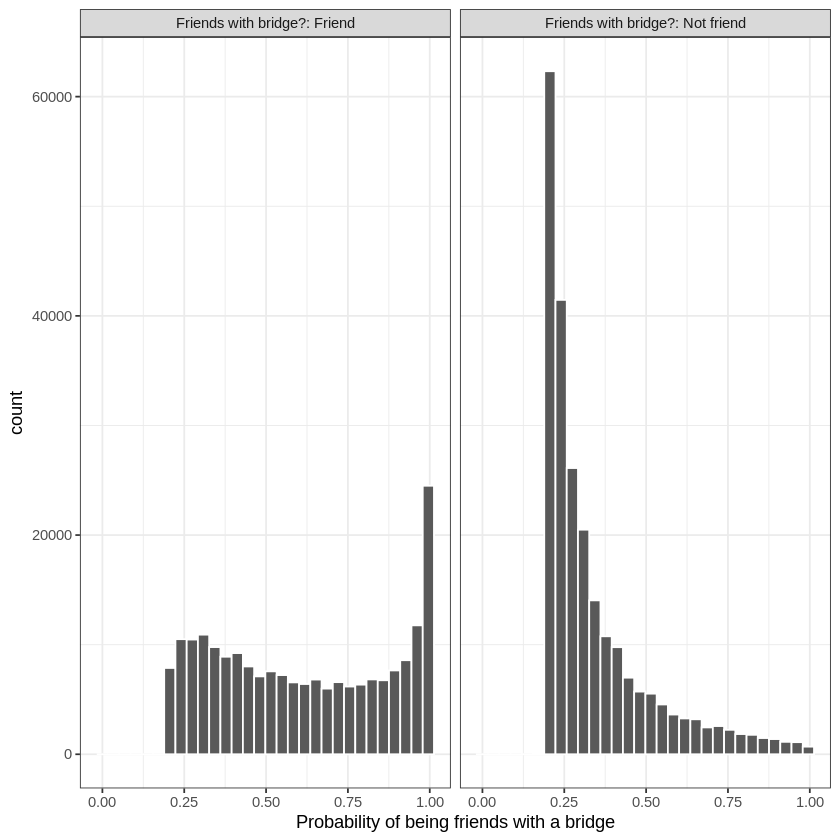

In [26]:
labs <- paste("Friends with bridge?:", c("Friend", "Not friend"))
prs_df %>%
  mutate(friends_with_bridge = ifelse(friends_with_bridge == 1, labs[1], labs[2])) %>%
  ggplot(aes(x = pr_score)) +
  geom_histogram(color = "white") +
  facet_wrap(~friends_with_bridge) +
  xlab("Probability of being friends with a bridge") +
  theme_bw()

In [29]:
mod_match <- matchit(friends_with_bridge ~ num_tweets + degree + followers + following + hashtag_count + url_count,
                     method = "nearest", data = data) 

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [ ]:
dta_m <- match.data(mod_match)
dim(dta_m)

In [ ]:
head(dta_m)

In [ ]:
write.table(dta_m, file = "/shared/0/projects/cross-lingual-exchange/data/dataframes/matched_df.tsv", sep='\t', col.names = NA)

In [ ]:
mod_match.out <- mod_match$match.matrix 

In [ ]:
mod_match.out

In [ ]:
write.table(mod_match.out, file = "/shared/0/projects/cross-lingual-exchange/data/dataframes/matched_pairs.tsv", sep='\t', col.names = NA)

In [ ]:
summary(mod_match)